           ds  AvgT  MaxWdSd  AvgHu  Sum_DL  50CM_SM  Avg_GT  Avg_IM  Rain  \
0  2011-01-02  -1.0      7.8   58.1     9.3       23     0.1   144.5   0.0   
1  2011-01-03  -0.7      7.1   55.6     5.6       23     0.0   116.0   0.0   
2  2011-01-04   0.4      8.9   62.5     7.3       23    -0.1   129.8   0.0   
3  2011-01-05   1.6     10.5   60.9     3.2       23     0.0    87.8   0.0   
4  2011-01-06  -0.9     13.2   61.0     6.8       23    -0.3   111.8   0.1   

           y  
0  10.935710  
1  10.886591  
2  11.532979  
3  12.619957  
4  11.764639  


<ipython-input-1-61be908a2ce3>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


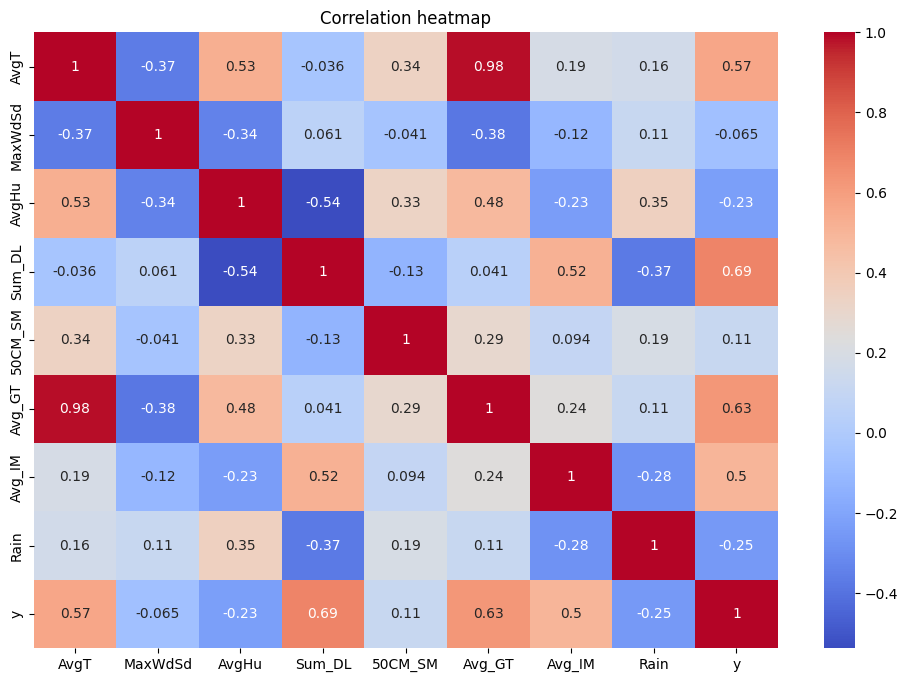

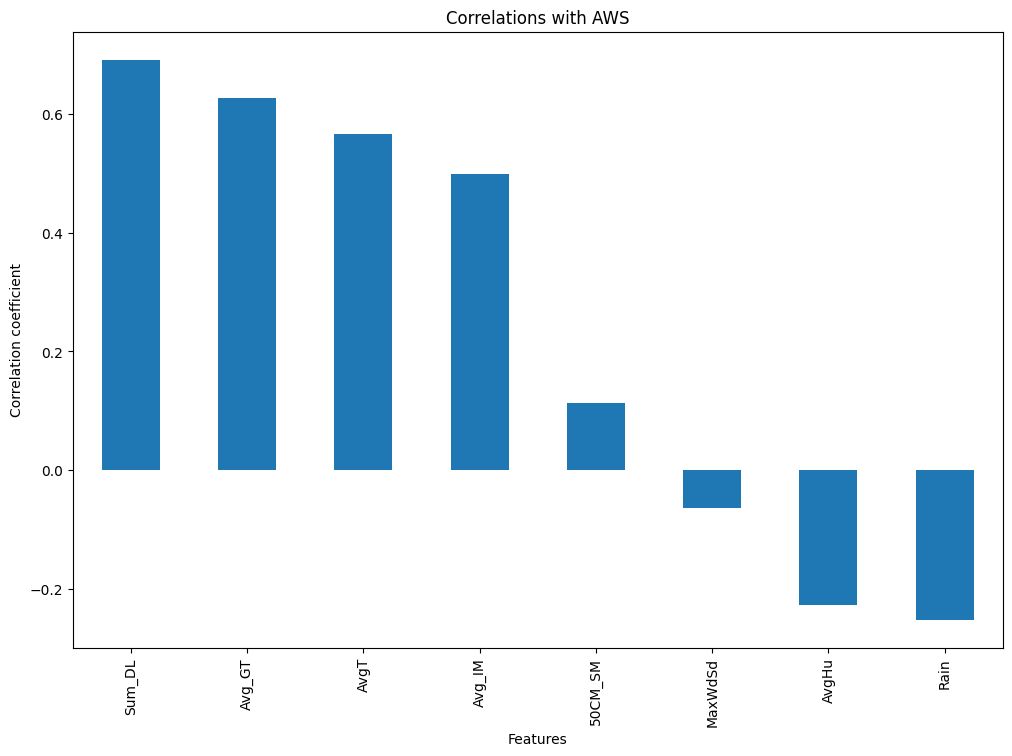

y          1.000000
Sum_DL     0.691886
Avg_GT     0.626510
AvgT       0.566160
Avg_IM     0.499673
Rain      -0.251976
AvgHu     -0.226536
50CM_SM    0.113319
MaxWdSd   -0.064655
Name: y, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/SWIG/보성군_AWS_및_기상_변수선정_및_전처리본_Eng.csv", encoding='cp949')
df = pd.DataFrame(data)
#data = data.rename(columns={'일시': 'Date'})
data.fillna(0, inplace=True)
print(data.head())
correlation_matrix = df.corr()


aws_correlation = correlation_matrix["y"].sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()


plt.figure(figsize=(12, 8))
aws_correlation.drop("y", inplace=True)
aws_correlation.plot(kind='bar')
plt.title("Correlations with AWS")
plt.ylabel("Correlation coefficient")
plt.xlabel("Features")
plt.show()


aws_correlation = correlation_matrix["y"].sort_values(ascending=False, key=abs)
print(aws_correlation)

<ipython-input-2-860f784f5e26>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


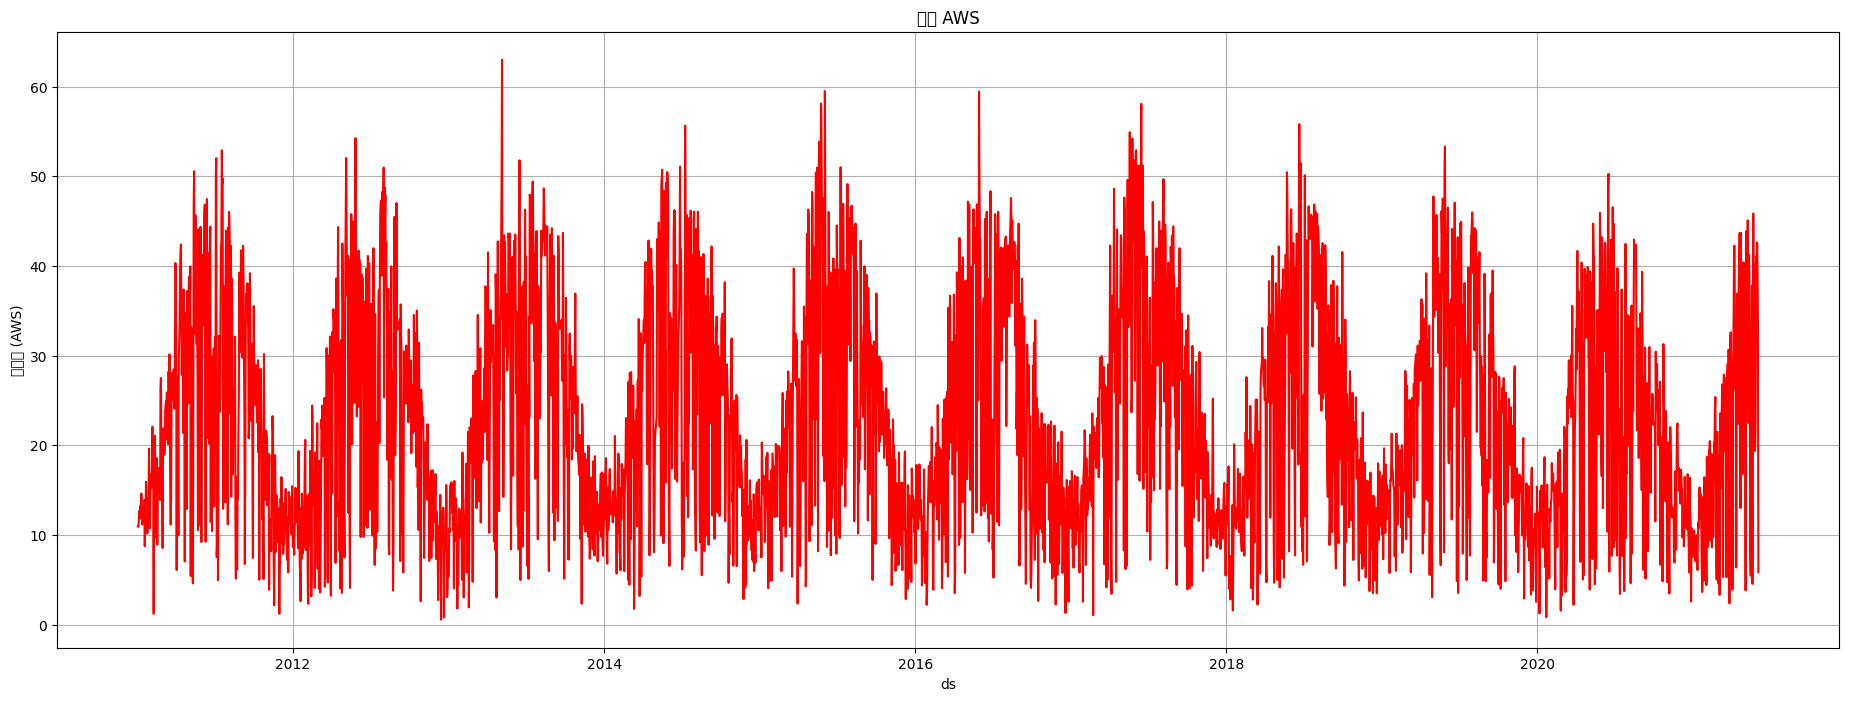

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44049 (\N{HANGUL SYLLABLE GAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


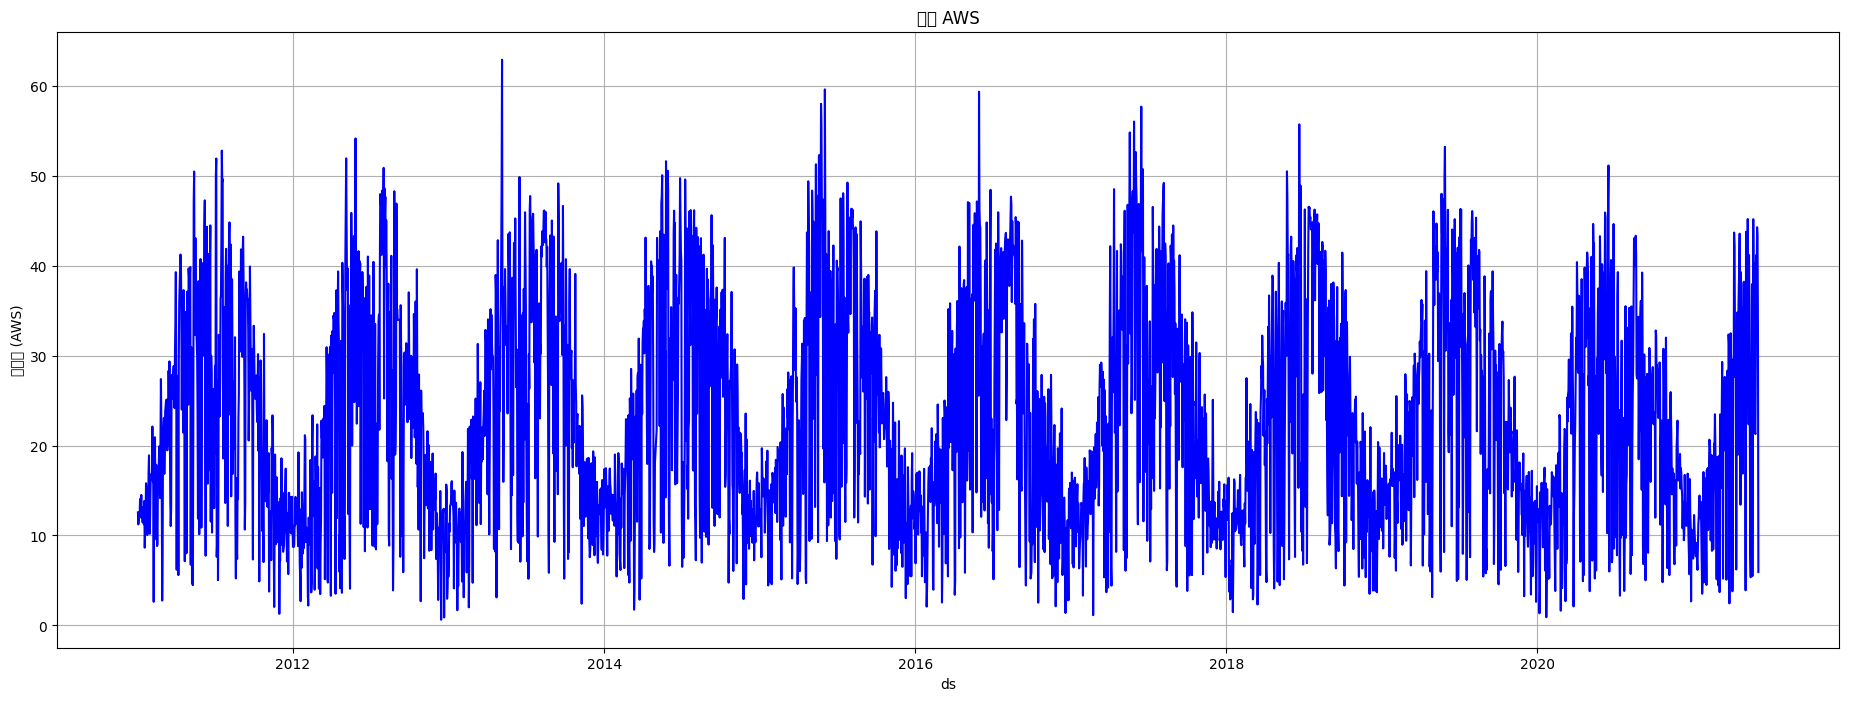

In [ ]:
correlation_values = {
    "Sum_DL": 0.691886,
    "Avg_GT": 0.626510,
    "AvgT": 0.566160,
    "Avg_IM": 0.499673,
    "Rain": -0.251976,
    "AvgHu": -0.226536,
    "50CM_SM": 0.113319,
    "MaxWdSd": -0.064655,
}

correlation_matrix = data.corr()
aws_correlation = correlation_matrix["y"]


#features_to_drop = [feature for feature, correlation in correlation_values.items() if abs(correlation) < 0.5]

X = data.drop(['ds', 'y'], axis=1)
y = data['y']


scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)


model = SVR(C=1000, epsilon=0.1, kernel='rbf')
model.fit(X_scaled, y)


predicted_AWS = model.predict(X_scaled)


data['ds'] = pd.to_datetime(data['ds'])

plt.figure(figsize=(23, 8))
plt.plot(data['ds'], y, label='Actual AWS', color='red')
plt.xlabel('ds')
plt.ylabel('실제값 (AWS)')
plt.title('실제 AWS')
plt.grid(True)
plt.show()

plt.figure(figsize=(23, 8))
plt.plot(data['ds'], predicted_AWS, label='Predicted AWS', color='blue')
plt.xlabel('ds')
plt.ylabel('예측갑 (AWS)')
plt.title('예측 AWS')
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-3-2325f7cfdda6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['y'].drop('y')


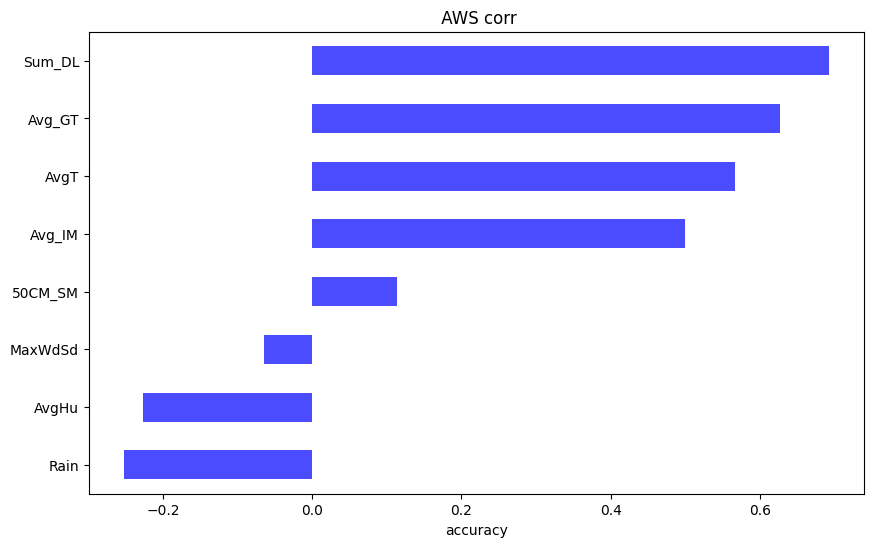

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

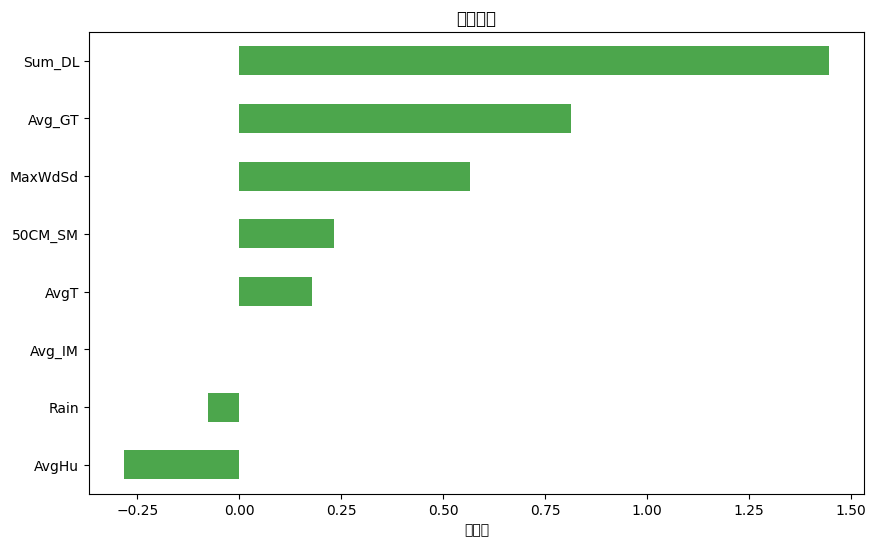

In [ ]:

correlation = df.corr()['y'].drop('y')


X = data.drop(['ds', 'y'], axis=1)
y = df['y']
reg = LinearRegression().fit(X, y)
coefficients = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])


plt.figure(figsize=(10, 6))
correlation.sort_values().plot(kind='barh', color='blue', alpha=0.7)
plt.title(" AWS corr")
plt.xlabel("accuracy")
plt.show()


plt.figure(figsize=(10, 6))
coefficients['Coefficient'].sort_values().plot(kind='barh', color='green', alpha=0.7)
plt.title("선형회기")
plt.xlabel("벨류갑")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(y, predicted_AWS)
mse = mean_squared_error(y, predicted_AWS)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 1.29
Mean Squared Error (MSE): 4.14
Root Mean Squared Error (RMSE): 2.04


In [ ]:
def get_previous_years_data(date_input, years=5):
    input_date = pd.to_datetime(date_input)
    previous_data = []

    for year in range(1, years+1):
        try:
            previous_date = f"{input_date.year - year}-{input_date.month:02d}-{input_date.day:02d}"
            data_row = data[data['Date'] == previous_date]
            if not data_row.empty:
                previous_data.append(data_row.drop(['Date', 'AWS'], axis=1).iloc[0])
        except ValueError:
            continue

    if len(previous_data) == 0:
        return None

    return pd.DataFrame(previous_data).mean().values.reshape(1, -1)

def predict_for_date(date_input):
    try:
        input_date = pd.to_datetime(date_input)
    except ValueError:
        print("잘못된 날짜 형식입니다. 다시 입력해주세요 (예: 2021-06-04).")
        return

    previous_data_features = get_previous_years_data(date_input)

    if previous_data_features is not None:
        scaled_features = scaler_X.transform(previous_data_features)
        predicted_value = model.predict(scaled_features)[0]
        print(f"예측된 AWS 값 for {date_input}: {predicted_value}")
    else:
        print(f"{date_input}에 대한 이전 년도 데이터가 충분하지 않습니다.")

if __name__ == "__main__":
    data = pd.read_csv("C:\\Users\\a5365\\OneDrive\\바탕 화면\\2011_01_02_2021_06_03_보성군_영어_AWS추가.csv")
    data.fillna(0, inplace=True)
    df = pd.DataFrame(data)

    X = data.drop(['Date', 'AWS'], axis=1)
    y = data['AWS']

    scaler_X = StandardScaler().fit(X)
    X_scaled = scaler_X.transform(X)

    model = SVR(C=1000, epsilon=0.1, kernel='rbf')
    model.fit(X_scaled, y)

    while True:
        date_input = input("날짜를 입력하세요 (예: 2021-06-04): ")
        predict_for_date(date_input)
